In [1]:
import sys
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer

#import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words

#pre-processing of text
import string
import re

#import classifiers from sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression



from sklearn.pipeline import Pipeline

#matplotlib imports are used to plot confusion matrices for the classifiers
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

#import time function from time module to track the training duration
from time import time

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

/Applications/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pravinbhat/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pravinbhat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pravinbhat/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_csv('./disaster_messages.csv')
df2 = pd.read_csv('./disaster_categories.csv')

In [3]:
def get_label_names(input_df,col,delimiter=";"):
    '''
    INPUT
        input_df: Input data frame containing the column which contains multiple categories separated by ";" delimiter
        colname : Column name which is to be used for computation of standard deviation value
    OUTPUT 
        input_df: Updated data frame containing engineering features
    '''
    col_series = input_df[col]
    col_series_new = col_series.dropna()
    i=0
    consol_list=[]
    for s in col_series_new:
        col_series_new_list = s.split(delimiter)
        col_series_new_list = [i for i in col_series_new_list if "-1" in i]
        col_series_new_list = [val [:-2] for val in col_series_new_list]
        print("col_series_new_list = ",col_series_new_list)
        consol_list.append(col_series_new_list)
        #if i==0:
        #    consol_list = col_series_new_list
        #else:
        #    for j in col_series_new_list:
        #        consol_list.insert(len(consol_list), j)
            #consol_list = consol_list.extend(devtype_new_list)
        i += 1
    
    return consol_list

In [93]:
target_labels = get_label_names(df2,'categories')

col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'weather_related', 'storm']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_products', 'other_aid', 'infrastructure_related', 'buildings', 'hospitals']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'weather_related', 'storm']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'shelter', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'medical_products', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'medical_products', 'water', 'food', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'other_infrastructure', 'weather_related', 'floods', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_relat

col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'buildings', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'shelter', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'food', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_products', 'search_and_rescue', 'security', 'other_aid', 'transport', 'weather_related', 'floods', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'search_and_rescue', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'search_and_rescue', 'security', 'transport', 'weather_related', 'floods', 'cold']
col_series_new_list =  [

col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'food', 'shelter', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'military', 'missing_people', 'death', 'other_aid', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  [

col_series_new_list =  ['related', 'request', 'aid_related', 'security', 'food']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_products', 'water', 'food', 'shelter', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'search_and_rescue', 'other_aid']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'food', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'medical_products', 'water', 'food', 'shelter', 'weather_related', 'storm', 'cold', 'other_weather', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'food', 'direct_report']
col_series_ne

col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  ['related', 'request', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'security', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'food', 'shelter']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request']
col_series_new_list =  ['related', 'request', 'aid_related', 'death', 'other_aid', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  []
col_series_new_list

col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'food', 'shelter', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'buildings', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products', 'other_aid', 'infrastructure_related', 'hospitals']
col_series_new_list =  ['related', 'aid_related', 'food']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'shelter', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'direct_report']
co

col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'other_aid', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'food', 'buildings', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'security', 'food', 'shelter', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'weather_related', 'cold', 'direct_report']
col_series_new_list =

col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'food', 'shelter', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'buildings', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'food', 'shelter', 'dir

col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'shelter', 'buildings', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related', 'request', 'weather_related', 'earthquake']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'other_aid']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'death', 'weather_related', 'earthquake']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['re

col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'shelter', 'buildings', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'buildings', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'refugees', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'medical_products']
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'shelter', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'clo

col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'water']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'weather_related', 'earthquake']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'death', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'transport', 'weather_related', 'floods', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'other_aid']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'water']
col_series_new_list =  ['related', 'request', 'aid_related',

col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'weather_related', 'other_weather', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'direct_report']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'food', 'buildings', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'shelter', 'refugees', 'direct_report']
col_series_new_list =  ['rel

col_series_new_list =  ['related', 'weather_related', 'storm', 'earthquake', 'other_weather']
col_series_new_list =  ['related', 'aid_related', 'shelter', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'medical_products', 'food']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'storm']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_relat

col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'shelter', 'buildings', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'death']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'weather_related', 'storm', 'direct

col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'medical_products', 'refugees', 'death',

col_series_new_list =  ['related', 'aid_related', 'other_aid', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'death', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'offer', 'aid_related', 'money', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related']
col_seri

col_series_new_list =  ['related', 'request', 'aid_related', 'medical_products', 'food', 'clothing', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'food', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'food', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'search_and_rescue', 'other_aid', 'weather_related', 'floods', 'storm', 'direct_report']
col_series_new_list =  ['related', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'food', 'clothing']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'food', 'weather_related', 'storm']
col_series_new_list =  ['related', 'aid_related', 'medical_products', 'food', 'clothing', 'weather_related', 'cold']
col_series_new_list 

col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  ['related', 'electricity']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products', 'missing_people', 'refugees', 'death', 'transport', 'weather_related', 'floods']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'request', 'aid_related', 'water', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'buildings', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'direct_report']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'earthquak

col_series_new_list =  ['related', 'weather_related', 'storm']
col_series_new_list =  []
col_series_new_list =  ['related', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related', 'weather_related', 'floods', 'storm', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'storm']
col_series_new_list =  ['related', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related', 'weather_related', 'storm']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'food', 'buildings', 'weather_related', 'storm', 'fire', 'direct_report']
col_series_new_list =  ['related', 'request', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related', 'electricity']
col_series_new_list =  ['related', 'weather_related', 'storm']
col_series

col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'weather_related', 'other_weather']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'weather_related', 'floods', 'direct_report']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'military', 'other_aid']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'weather_related', 'floods']
col_series_new_list =  ['related', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'aid_related', 'death', 'infras

col_series_new_list =  ['related', 'aid_related', 'medical_help', 'other_aid', 'transport', 'weather_related', 'floods', 'cold']
col_series_new_list =  ['related', 'weather_related', 'floods', 'earthquake', 'cold']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'cold']
col_series_new_list =  ['related', 'weather_related', 'fire']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'storm', 'other_weather']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'other_weather']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'weather_related', 'storm']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'request', 'aid_related'

col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'floods']
col_series_new_list =  ['related', 'infrastructure_related', 'buildings', 'other_infrastructure', 'weather_related', 'floods', 'other_weather', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'storm', 'cold']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'death', 'weather_related', 'cold']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'transport', 'weather_related', 'floods']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'weather_related', 'floods']
col_series_new_list =  ['related', 'infrastructure_related', 'transport', 'other_infrastructure', 'weather_related', 'earthquake', 'cold']
col_series_new_list =  ['related', 'aid_related', 'water', 

col_series_new_list =  ['related', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'storm', 'cold']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_products', 'water', 'food', 'shelter', 'other_aid']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'other_weather']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'water', 'shelter', 'other_aid', 'infrastructure_related', 'hospitals', 'aid_centers', 'other_infrastructure', 'weather_related', 'other_weather']
col_series_new_list =  ['related', 'request', 'aid_related', 'food']
col_series_new_list =  ['related', 'aid_related', 'death', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'aid_related', 'death']
col_series_new_list =  ['related', 'aid_related', 'water', 'food', 'money', 'death', 'other_aid', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'othe

col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'food', 'shelter', 'weather_related', 'storm', 'direct_report']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'money']
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid']
col_series_new_list =  ['related', 'aid_related', 'medical_help']
col_series_new_list =  ['related', 'infrastructure_related', 'transport', 'other_infrastructure', 'weather_related', 'storm', 'other_weather']
col_series_new_list =  ['related', 'aid_related', 'money']
col_series_new_list =  ['related', 'weather_related', 'storm']
col_series_new_list =  ['related', 'aid_related', 'water', 'weather_related', 'cold', 'other_weather']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  

col_series_new_list =  ['related', 'aid_related', 'shelter', 'refugees']
col_series_new_list =  ['related', 'aid_related', 'search_and_rescue', 'military', 'other_aid', 'weather_related', 'other_weather']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'weather_related', 'other_weather']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'death', 'infrastructure_related', 'buildings', 'electricity', 'other_infrastructure', 'weather_related', 'earthquake', 'other_weather']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related', 'aid_related', 'shelter', 'other_aid', 'buildings', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'aid_related', 'food', 'death', 'transport', 'weather_related', 'floods']
col_series_new_list =  ['related', 'request', 'aid_related', 'medica

col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'request', 'aid_related', 'food']
col_series_new_list =  ['related', 'aid_related', 'death', 'weather_related', 'floods', 'storm', 'other_weather']
col_series_new_list =  ['related', 'weather_related', 'storm']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'medical_products', 'shelter', 'weather_related', 'earthquake']
col_series_new_list =  []
col_series_new_list =  ['related', 'weather_related', 'other_weather']
col_series_new_list =  ['related', 'weather_related', 'floods']
col_series_new_list =  ['related', 'weather_related', 'earthquake', 'other_weather']
col_series_new_list =  ['related', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'floods']
col_series_new_list =  ['related', 'weather_related', 'other_weather']
col_series_new_list =  []
col_series_new_list =  ['related', 'infrastructure_related', 

col_series_new_list =  ['related', 'electricity']
col_series_new_list =  ['related', 'aid_related', 'shelter', 'refugees']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related', 'weather_related', 'other_weather']
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'tools', 'weather_related', 'other_weather']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related', 'aid_related', 'search_and_rescue', 'buildings', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'food', 'weather_related', 'floods']
col_series_new_list =  ['related', 'request']
col_series_new_list =  ['related', 'aid_related', 'military', 'refugees']
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help', 'other_aid']
col_series_new_list =  ['related', 'aid_related', 'shelter', 'refugees', 'infras

col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'other_aid']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'water', 'electricity']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'shelter', 'money', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'money']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related', 'aid_related', 'money', 'weather_related', 'other_weather']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'security', 'death', 'infrastructure_related', 'aid_centers']
col_series_new_list =  ['related', 'aid_related', 'death', 'weather_related', 'floods', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'food']
col_ser

col_series_new_list =  ['related', 'aid_related', 'death']
col_series_new_list =  ['related', 'electricity', 'weather_related', 'storm']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'shelter', 'buildings', 'weather_related', 'floods']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'security', 'military', 'transport', 'weather_related', 'floods']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'shelter', 'refugees', 'other_aid']
col_series_new_list =  ['related', 'aid_related', 'military', 'missing_people', 'refugees', 'transport', 'weather_related', 'floods']
col_series_new_list =  ['related', 'request', 'aid_related', 'shelter', 'refugees']
col_series_new_list =  ['related', 'aid_related', 'security', 'military', 'death', 'weather_related', 'fire']
col_series_new_list =

col_series_new_list =  ['related', 'aid_related', 'shelter', 'refugees']
col_series_new_list =  ['related', 'request', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'medical_products', 'food', 'shelter']
col_series_new_list =  ['related', 'aid_related', 'other_aid']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'other_aid']
col_series_new_list =  ['related', 'request', 'aid_related', 'food', 'money', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'medical_help']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products', 'shelter', 'other_aid', 'transport', 'buildings', 'weather_related', 'floods', 'other_weather', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'money', 'transport', 'weather_related', 'floods

col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'refugees']
col_series_new_list =  ['related', 'aid_related', 'shelter', 'money', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'food', 'shelter', 'refugees', 'other_aid', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'floods']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'other_infrastructure', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'medical_help']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'other_aid']
col_series_new_list =  ['related', 'aid_related', 'search_and_rescue', 'food', 'infrastructure_related', 'aid_centers', 'weather_related', 'fire']
col_series_new_li

col_series_new_list =  ['related', 'aid_related', 'shelter', 'infrastructure_related', 'buildings', 'aid_centers']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'buildings']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'water', 'infrastructure_related', 'other_infrastructure']
col_series_new_list =  ['related', 'infrastructure_related', 'other_infrastructure']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'other_aid']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'food', 'refugees']
col_series_new_list =  ['related', 'aid_related', 'money']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'water', 'food']
col_series_new_list =  ['related', 'weather_related'

col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'medical_help']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'food']
col_series_new_list =  ['related', 'transport', 'buildings', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'weather_related', 'floods', 'storm']
col_series_new_list =  ['related', 'weather_related', 'floods']
col_series_new_list =  []
col_series_new_list =  ['related', 'buildings', 'weather_related', 'other_weather', 'direct_report']
col_series_new_list =  ['related', 'infrastructure_related', 'buildings', 'other_infrastructure', 'weather_related', 'other_weather']
col_series_new_list =  []
col_series_new_list =  ['related', 'weather_related', 'floods']
col_series_new_list =  ['related', 'aid_r

col_series_new_list =  ['related', 'aid_related', 'shelter', 'infrastructure_related', 'aid_centers', 'weather_related', 'other_weather']
col_series_new_list =  ['related', 'aid_related', 'security', 'death']
col_series_new_list =  ['related', 'aid_related', 'food', 'transport', 'weather_related', 'floods']
col_series_new_list =  ['related', 'weather_related', 'earthquake']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'money', 'refugees', 'transport']
col_series_new_list =  ['related', 'aid_related', 'medical_products', 'food', 'shelter', 'clothing']
col_series_new_list =  ['related', 'infrastructure_related', 'buildings', 'electricity', 'other_infrastructure', 'weather_related', 'floods']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products', 'water', 'food', 'other_aid']
col_series_new_list =  ['related', 'aid_related', 'water', 'weather_related', 'other_weather'

col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'food']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'food', 'shelter', 'death', 'infrastructure_related', 'other_infrastructure']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'infrastructure_related', 'hospitals']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'security', 'military', 'other_aid']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'water', 'food']
col_series_new_list =  ['related', 'aid_related', 'military', 'other_aid']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products', 'weather_related', 'earthquake']
col_series_new_list =  []
col_series

col_series_new_list =  ['related', 'aid_related', 'death', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related', 'electricity', 'weather_related', 'cold']
col_series_new_list =  ['related', 'aid_related', 'medical_help']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'infrastructure_related', 'buildings', 'other_infrastructure', 'weather_related', 'storm']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products']
col_series_new_list =  ['related', 'aid_related', 'shelter', 'weather_related', 'floods', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'search_and_rescue', 'weather_related', 'cold']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products', 'refugees']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'transport', 'weather_rela

col_series_new_list =  ['related', 'aid_related', 'military', 'weather_related', 'storm']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'other_aid', 'infrastructure_related', 'other_infrastructure', 'weather_related', 'other_weather', 'direct_report']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'military', 'death']
col_series_new_list =  []
col_series_new_list =  ['related', 'request', 'aid_related', 'other_aid', 'direct_report']
col_series_new_list =  ['related', 'aid_related', 'other_aid']
col_series_new_list =  ['related', 'buildings', 'weather_related', 'earthquake']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related', 'aid_related', 'refugees']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related', 'aid_related', 'food']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_relate

col_series_new_list =  ['related', 'weather_related', 'floods']
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'money', 'other_aid', 'weather_related', 'floods']
col_series_new_list =  []
col_series_new_list =  ['related', 'aid_related', 'medical_help', 'medical_products', 'infrastructure_related', 'hospitals']
col_series_new_list =  ['related', 'aid_related', 'refugees']
col_series_new_list =  ['related', 'request', 'direct_report']
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  []
col_series_new_list =  []
col_series_new_list =  ['related']
col_series_new_list =  ['related', 'aid_related', 'military']
col_series_new_list =  ['related']


In [41]:
target_labels

[['related'],
 ['related', 'aid_related', 'other_aid', 'weather_related', 'storm'],
 ['related'],
 ['related',
  'request',
  'aid_related',
  'medical_products',
  'other_aid',
  'infrastructure_related',
  'buildings',
  'hospitals'],
 ['related'],
 [],
 ['related', 'weather_related', 'storm'],
 ['related', 'request', 'aid_related', 'water', 'shelter', 'direct_report'],
 [],
 ['related',
  'request',
  'aid_related',
  'medical_help',
  'medical_products',
  'direct_report']]

In [94]:
#Create data frame in message and tags format
cleaned_message = data_new.cleaned_message
df_message_with_tags ['Tags'] = target_labels
tags = pd.Series(target_labels)
df_message_with_tags = pd.concat([cleaned_message,tags],axis=1).reset_index()
df_message_with_tags.columns = ['index','cleaned_message','tags']
df_message_with_tags = df_message_with_tags.drop(['index'],axis=1)

In [96]:
#df_message_with_tags.to_csv("df_message_with_tags.csv")

In [4]:
def get_unique_list_of_values(input_df,col,delimiter=";"):
    '''
    INPUT
        input_df: Input data frame containing the column which contains multiple categories separated by ";" delimiter
        colname : Column name which is to be used for computation of standard deviation value
    OUTPUT 
        input_df: Updated data frame containing engineering features
    '''
    col_series = input_df[col]
    col_series_new = col_series.dropna()
    i=0
    for s in col_series_new:
        col_series_new_list = s.split(delimiter)
        col_series_new_list = [val [:-2] for val in col_series_new_list]
        if i==0:
            consol_list = col_series_new_list
        else:
            for j in col_series_new_list:
                consol_list.insert(len(consol_list), j)
            #consol_list = consol_list.extend(devtype_new_list)
        i += 1
    list_of_unique_values = list(set(consol_list))
    print ("List of unique values for ",col," :\n" , list_of_unique_values)
    print ("# of unique values for ",col," :" , len(list_of_unique_values))
    
    #Create category labels for each of those items
    label_prefix = "Cat_"
    cat_labels = [label_prefix + val for val in list_of_unique_values]
    
    return list_of_unique_values, cat_labels

def create_cat_cols_for_multvalcols(source_col,source_value_list,cat_col_list,input_df):
    '''
    INPUT
        source col - source column from which category columns to be created
        source_value_list  - list containing values to be searched in the source column
        cat_col_list       - list containing category column names to be created
        colname_prefix     - Prefix for column name to be created for rows with missing values
        others_categ_list  - List of categories that need to be cmbined in "Others" category
        input_df                 - source df
    OUTPUT
        output_df                 - Updated source df containing category columns created as per columns listed in cat_col_list
    '''
    output_df = input_df
    i=0
    for source_value in source_value_list:
        cat_col = cat_col_list[i]
        pattern = source_value + '-1'
        print("cat col = ",cat_col,"source col = ",source_col)
        output_df [cat_col] = np.where(output_df[source_col].str.contains(pattern),1,0)
        i += 1
    
    output_df = output_df.drop(['id','categories'],axis=1)
    return output_df

In [5]:
target_label_lst,cat_labels = get_unique_list_of_values(df2,'categories')

List of unique values for  categories  :
 ['transport', 'weather_related', 'floods', 'clothing', 'death', 'missing_people', 'shops', 'aid_centers', 'aid_related', 'shelter', 'related', 'other_aid', 'medical_help', 'tools', 'direct_report', 'money', 'fire', 'search_and_rescue', 'other_infrastructure', 'refugees', 'medical_products', 'earthquake', 'infrastructure_related', 'offer', 'hospitals', 'cold', 'water', 'storm', 'electricity', 'request', 'food', 'buildings', 'security', 'child_alone', 'military', 'other_weather']
# of unique values for  categories  : 36


In [6]:
df2_new = create_cat_cols_for_multvalcols('categories',target_label_lst,cat_labels,df2)

cat col =  Cat_transport source col =  categories
cat col =  Cat_weather_related source col =  categories
cat col =  Cat_floods source col =  categories
cat col =  Cat_clothing source col =  categories
cat col =  Cat_death source col =  categories
cat col =  Cat_missing_people source col =  categories
cat col =  Cat_shops source col =  categories
cat col =  Cat_aid_centers source col =  categories
cat col =  Cat_aid_related source col =  categories
cat col =  Cat_shelter source col =  categories
cat col =  Cat_related source col =  categories
cat col =  Cat_other_aid source col =  categories
cat col =  Cat_medical_help source col =  categories
cat col =  Cat_tools source col =  categories
cat col =  Cat_direct_report source col =  categories
cat col =  Cat_money source col =  categories
cat col =  Cat_fire source col =  categories
cat col =  Cat_search_and_rescue source col =  categories
cat col =  Cat_other_infrastructure source col =  categories
cat col =  Cat_refugees source col =  

In [88]:
cat_labels

['Cat_other_aid',
 'Cat_clothing',
 'Cat_other_infrastructure',
 'Cat_aid_related',
 'Cat_cold',
 'Cat_direct_report',
 'Cat_storm',
 'Cat_tools',
 'Cat_refugees',
 'Cat_request',
 'Cat_related',
 'Cat_weather_related',
 'Cat_other_weather',
 'Cat_military',
 'Cat_food',
 'Cat_search_and_rescue',
 'Cat_earthquake',
 'Cat_electricity',
 'Cat_security',
 'Cat_fire',
 'Cat_aid_centers',
 'Cat_missing_people',
 'Cat_water',
 'Cat_death',
 'Cat_offer',
 'Cat_child_alone',
 'Cat_transport',
 'Cat_medical_help',
 'Cat_floods',
 'Cat_medical_products',
 'Cat_shelter',
 'Cat_infrastructure_related',
 'Cat_buildings',
 'Cat_shops',
 'Cat_money',
 'Cat_hospitals']

In [63]:
label_list = [val [4:] for val in cat_labels]
label_list

['request',
 'money',
 'shelter',
 'infrastructure_related',
 'child_alone',
 'weather_related',
 'cold',
 'death',
 'water',
 'military',
 'security',
 'earthquake',
 'other_weather',
 'food',
 'other_infrastructure',
 'transport',
 'offer',
 'other_aid',
 'search_and_rescue',
 'buildings',
 'tools',
 'clothing',
 'medical_help',
 'hospitals',
 'aid_centers',
 'direct_report',
 'electricity',
 'aid_related',
 'refugees',
 'shops',
 'related',
 'storm',
 'medical_products',
 'floods',
 'fire',
 'missing_people']

In [7]:
#df2_new = df2_new.drop(['id','categories'],axis=1)
df2_new.shape

(26248, 36)

In [10]:
def load_data():
    df = pd.read_csv('./disaster_messages.csv')
    df2 = pd.read_csv('./disaster_categories.csv')
    X = df.message.values
    y = df2.categories.values
    return X, y
X, y = load_data()

In [11]:
def tokenize(text):
    #detected_urls = re.findall(url_regex, text)
    #for url in detected_urls:
    #    text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [14]:
for message in X[:5]:
    tokens = tokenize(message)
    print(message)
    print(tokens, '\n')

Weather update - a cold front from Cuba that could pass over Haiti
['weather', 'update', '-', 'a', 'cold', 'front', 'from', 'cuba', 'that', 'could', 'pas', 'over', 'haiti'] 

Is the Hurricane over or is it not over
['is', 'the', 'hurricane', 'over', 'or', 'is', 'it', 'not', 'over'] 

Looking for someone but no name
['looking', 'for', 'someone', 'but', 'no', 'name'] 

UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.
['un', 'report', 'leogane', '80-90', 'destroyed', '.', 'only', 'hospital', 'st.', 'croix', 'functioning', '.', 'needs', 'supply', 'desperately', '.'] 

says: west side of Haiti, rest of the country today and tonight
['say', ':', 'west', 'side', 'of', 'haiti', ',', 'rest', 'of', 'the', 'country', 'today', 'and', 'tonight'] 



In [24]:
class_counts

PercentageOfTotalMessages  \
Cat_transport                                    4.58   
Cat_weather_related                             27.83   
Cat_floods                                       8.22   
Cat_clothing                                     1.55   
Cat_death                                        4.56   
Cat_missing_people                               1.14   
Cat_shops                                        0.46   
Cat_aid_centers                                  1.18   
Cat_aid_related                                 41.44   
Cat_shelter                                      8.83   
Cat_related                                     75.93   
Cat_other_aid                                   13.14   
Cat_medical_help                                 7.95   
Cat_tools                                        0.61   
Cat_direct_report                               19.36   
Cat_money                                        2.30   
Cat_fire                                         1.07   
Cat_search_and_rescue                            2.76   
Cat_other_infrastructure                         4.39   
Cat_refugees                                     3.34   
Cat_medical_products                             5.01   
Cat_earthquake                                   9.35   
Cat_infrastructure_related                       6.50   
Cat_offer                                        0.45   
Cat_hospitals                                    1.08   
Cat_cold                                         2.02   
Cat_water                                        6.38   
Cat_storm                                        9.33   
Cat_electricity                                  2.03   
Cat_request                                     17.07   
Cat_food                                        11.16   
Cat_buildings                                    5.09   
Cat_security                                     1.79   
Cat_child_alone                                  0.00   
Cat_military                                     3.28   
Cat_other_weather                                5.24   

                                              Category  
Cat_transport                            Cat_transport  
Cat_weather_related                Cat_weather_related  
Cat_floods                                  Cat_floods  
Cat_clothing                              Cat_clothing  
Cat_death                                    Cat_death  
Cat_missing_people                  Cat_missing_people  
Cat_shops                                    Cat_shops  
Cat_aid_centers                        Cat_aid_centers  
Cat_aid_related                        Cat_aid_related  
Cat_shelter                                Cat_shelter  
Cat_related                                Cat_related  
Cat_other_aid                            Cat_other_aid  
Cat_medical_help                      Cat_medical_help  
Cat_tools                                    Cat_tools  
Cat_direct_report                    Cat_direct_report  
Cat_money                                    Cat_money  
Cat_fire                                      Cat_fire  
Cat_search_and_rescue            Cat_search_and_rescue  
Cat_other_infrastructure      Cat_other_infrastructure  
Cat_refugees                              Cat_refugees  
Cat_medical_products              Cat_medical_products  
Cat_earthquake                          Cat_earthquake  
Cat_infrastructure_related  Cat_infrastructure_related  
Cat_offer                                    Cat_offer  
Cat_hospitals                            Cat_hospitals  
Cat_cold                                      Cat_cold  
Cat_water                                    Cat_water  
Cat_storm                                    Cat_storm  
Cat_electricity                        Cat_electricity  
Cat_request                                Cat_request  
Cat_food                                      Cat_food  
Cat_buildings                            Cat_buildings  
Cat_security                         

In [31]:
class_counts = pd.DataFrame(data=round(df2_new.sum()/df2_new.shape[0],4)*100,columns=['PercentageOfTotalMessages'])
class_counts['Category'] = class_counts.index

import plotly.express as px
fig = px.bar(class_counts, labels={'Category':'<b> Category<b>','PercentageOfTotalMessages':'<b>% of Total Messages<b>'},color="PercentageOfTotalMessages",
             y="Category", x='PercentageOfTotalMessages', orientation='h'
            , title = '<b>Messages per category as (%) of Total Messages<b>')
fig.show()

Imbalanced dataset

### Text cleaning

In [34]:
def clean_docs(text):
    stopwords = stop_words.ENGLISH_STOP_WORDS
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"there's", "there is ", text)
    text = re.sub(r"let's", "let us ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"couldn't", "could not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    text = "".join([char for char in text if char not in string.punctuation and not char.isdigit()])
    text = " ".join([token for token in text.split() if token not in stopwords])
    return text

In [35]:
df['cleaned_message'] = df['message'].map(lambda com : clean_docs(com))

In [84]:
df['cleaned_message'].tail(20)

26228    new constitution declares omalia federal sover...
26229    providing clean water people forced walk miles...
26230    relief items include towels sanitary napkins s...
26231    aceh meulaboh town refugee agency said begun a...
26232    recruiting sanitary engineer consultant februa...
26233    following severe floods occurred previous year...
26234     closure stopped inbound flights outbound flights
26235    bangkok january nnt prime minister yingluck sh...
26236    cadmium metallic element widely used batteries...
26237    epidemic surveillance national institute commu...
26238    sporadic skirmishes eastern d r congo bombing ...
26239    army gone greater lengths avoid civilian causa...
26240    delivery conjunction wfp staffers rented truck...
26241    ecowas wanted lead month transition democratic...
26242    hpakant area rich coveted jade stones seen rec...
26243    training demonstrated enhance micronutrient pr...
26244    suitable candidate selected ocha jakarta curre.

In [36]:
df_new = pd.concat([df.cleaned_message,df2_new],axis=1)
df_new.shape

(26248, 37)

#### Exploaratory Data Analysis

In [62]:
RowSums = df_new.iloc[:,2:].sum(axis=1)
MultiLabelCounts = pd.DataFrame(data=RowSums.value_counts(),columns=['NoOfMessages'])
MultiLabelCounts['NoOfLabels'] = MultiLabelCounts.index
MultiLabelCounts 

NoOfMessages  NoOfLabels
0           6318           0
1           5172           1
3           3709           3
5           2986           5
4           2234           4
6           1963           6
7           1388           7
8            829           8
9            545           9
2            424           2
10           297          10
11           164          11
12            83          12
13            58          13
14            23          14
15            15          15
16            13          16
17             8          17
19             6          19
20             5          20
18             3          18
26             2          26
21             1          21
22             1          22
23             1          23

In [60]:
RowSums = df_new.iloc[:,2:].sum(axis=1)
MultiLabelCounts = pd.DataFrame(data=RowSums.value_counts(),columns=['NoOfMessages'])
MultiLabelCounts['NoOfLabels'] = MultiLabelCounts.index
MultiLabelCounts 

#import plotly.express as px
fig = px.bar(MultiLabelCounts, labels={'NoOfMessages':'<b> Number of Messages<b>','NoOfLabels':'<b>Number of Labels<b>'},
             y='NoOfMessages', x='NoOfLabels'
            , text = 'NoOfMessages', title = '<b>Messages having multiple labels<b>')
fig.show()

/Applications/anaconda/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



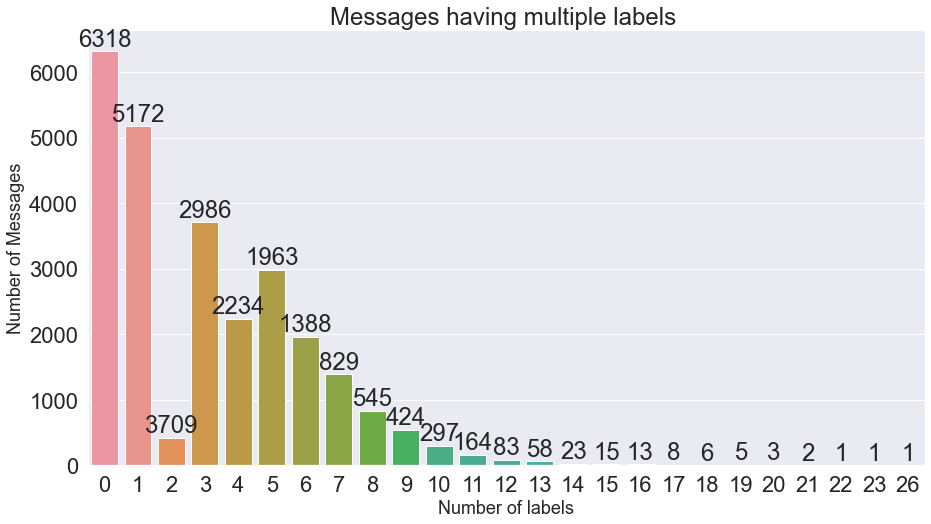

In [66]:
import seaborn as sns
rowSums = df_new.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
#multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Messages having multiple labels ")
plt.ylabel('Number of Messages', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

#### Around 25% of the messages have no labels

In [69]:
#Add a column LabelSum (to count the number of sums) and visualize the WordCloud
df_new ['LabelSum'] = df_new.iloc[:,2:].sum(axis=1)

0     6318
1     5172
3     3709
5     2986
4     2234
6     1963
7     1388
8      829
9      545
2      424
10     297
11     164
12      83
13      58
14      23
15      15
16      13
17       8
19       6
20       5
18       3
26       2
21       1
22       1
23       1
Name: LabelSum, dtype: int64

In [76]:
def plot_wordcloud(input_df,plot_title):
    plt.figure(figsize=(40,25))

    # clean
    subset = df_new[df_new.LabelSum==0]
    text = subset.cleaned_message.values
    cloud = WordCloud(
                              stopwords=STOPWORDS,
                              background_color='black',
                              collocations=False,
                              width=2500,
                              height=1800
                             ).generate(" ".join(text))
    plt.axis('off')
    plt.title(plot_title,fontsize=40)
    plt.imshow(cloud)
    return ''

''

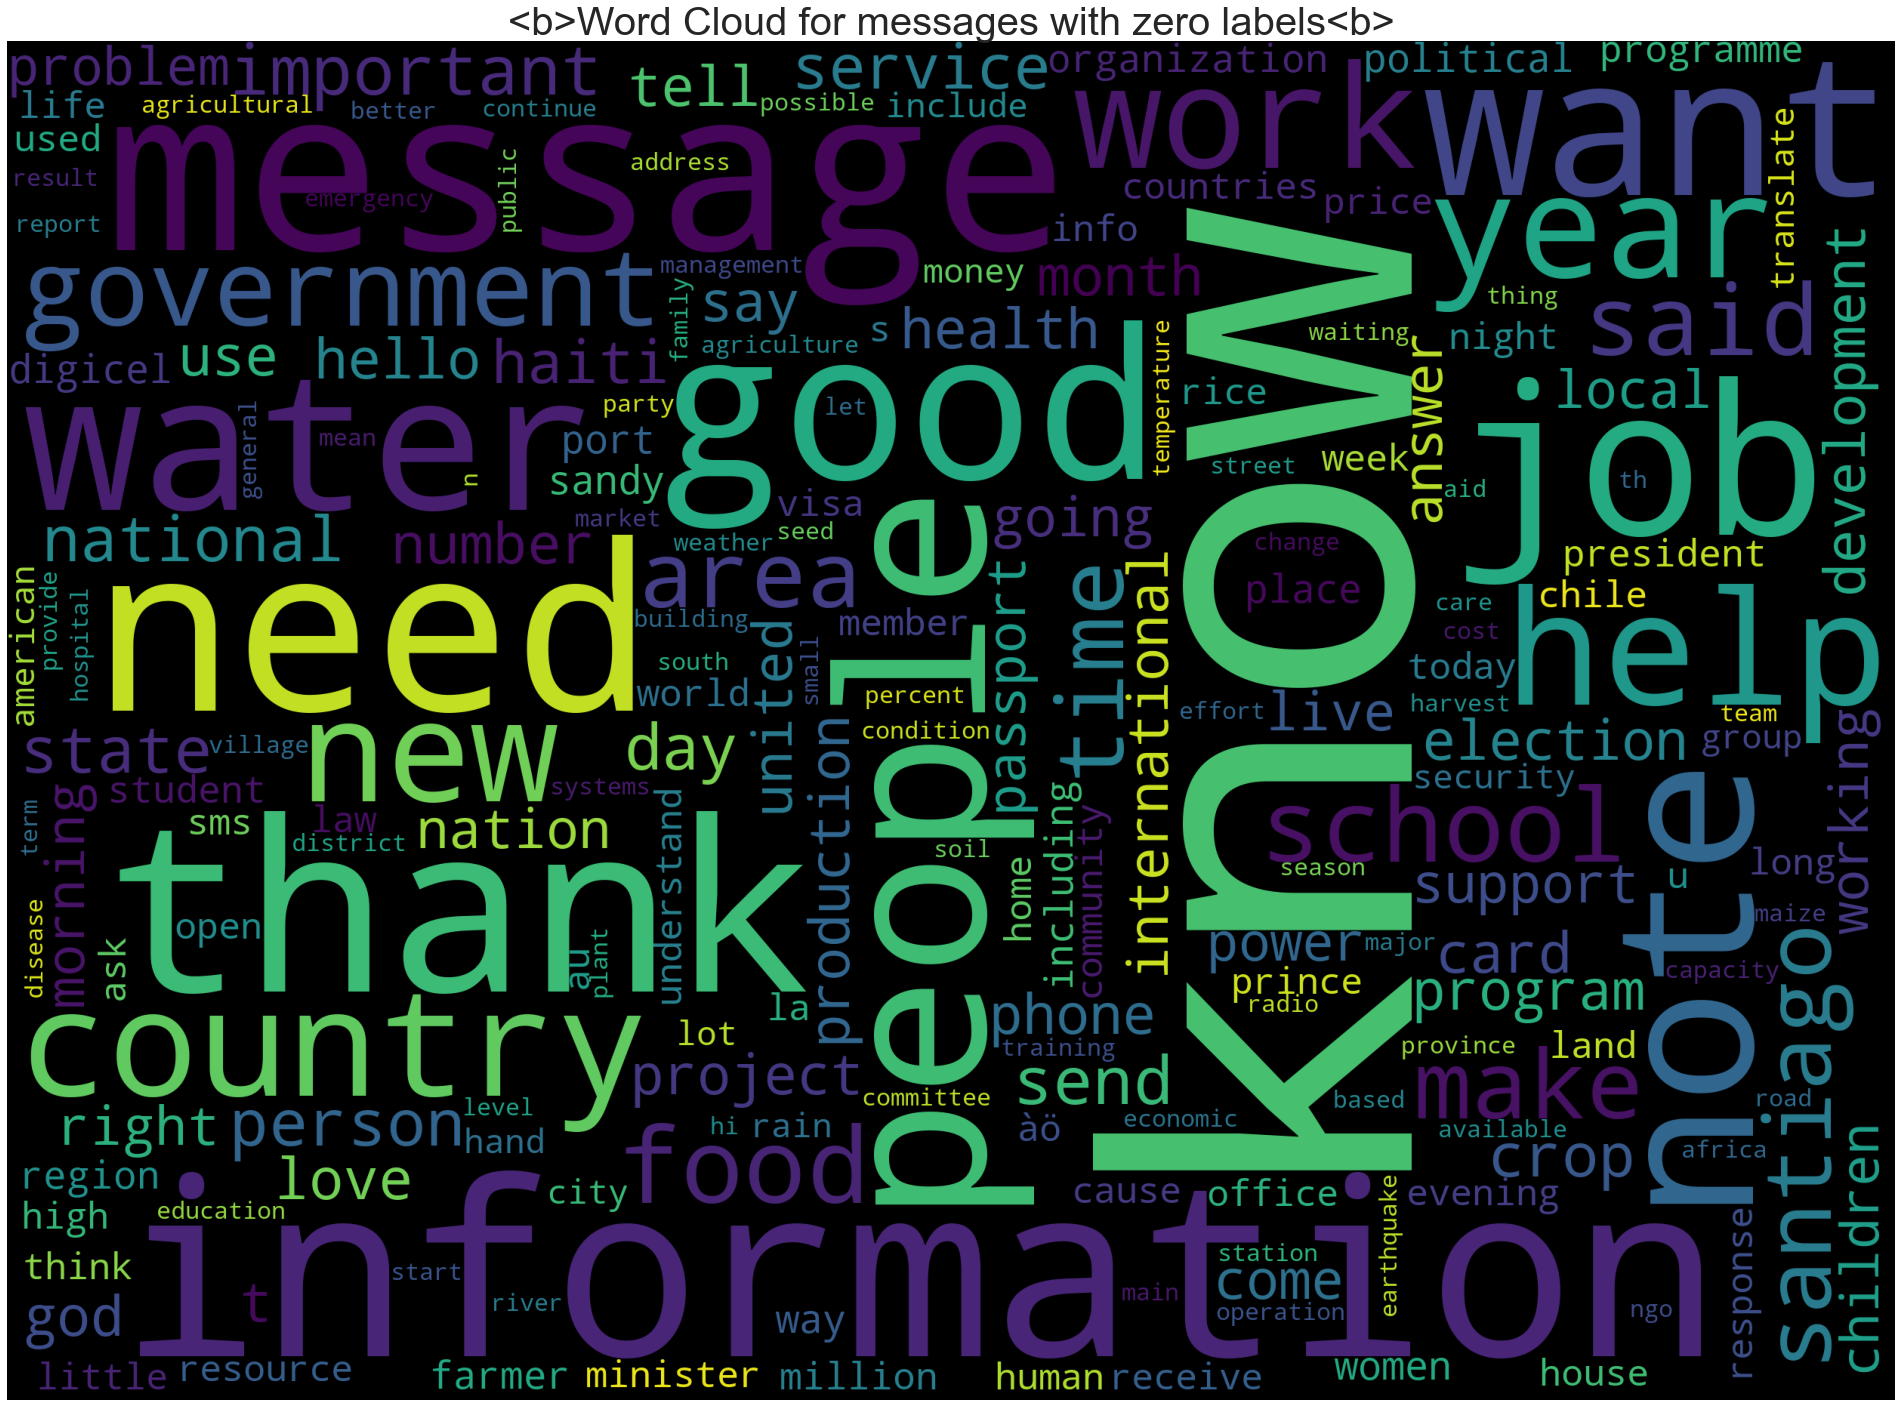

In [77]:
subset = df_new[df_new.LabelSum==0]
plot_title = "<b>Word Cloud for messages with zero labels<b>"
plot_wordcloud(subset,plot_title)

''

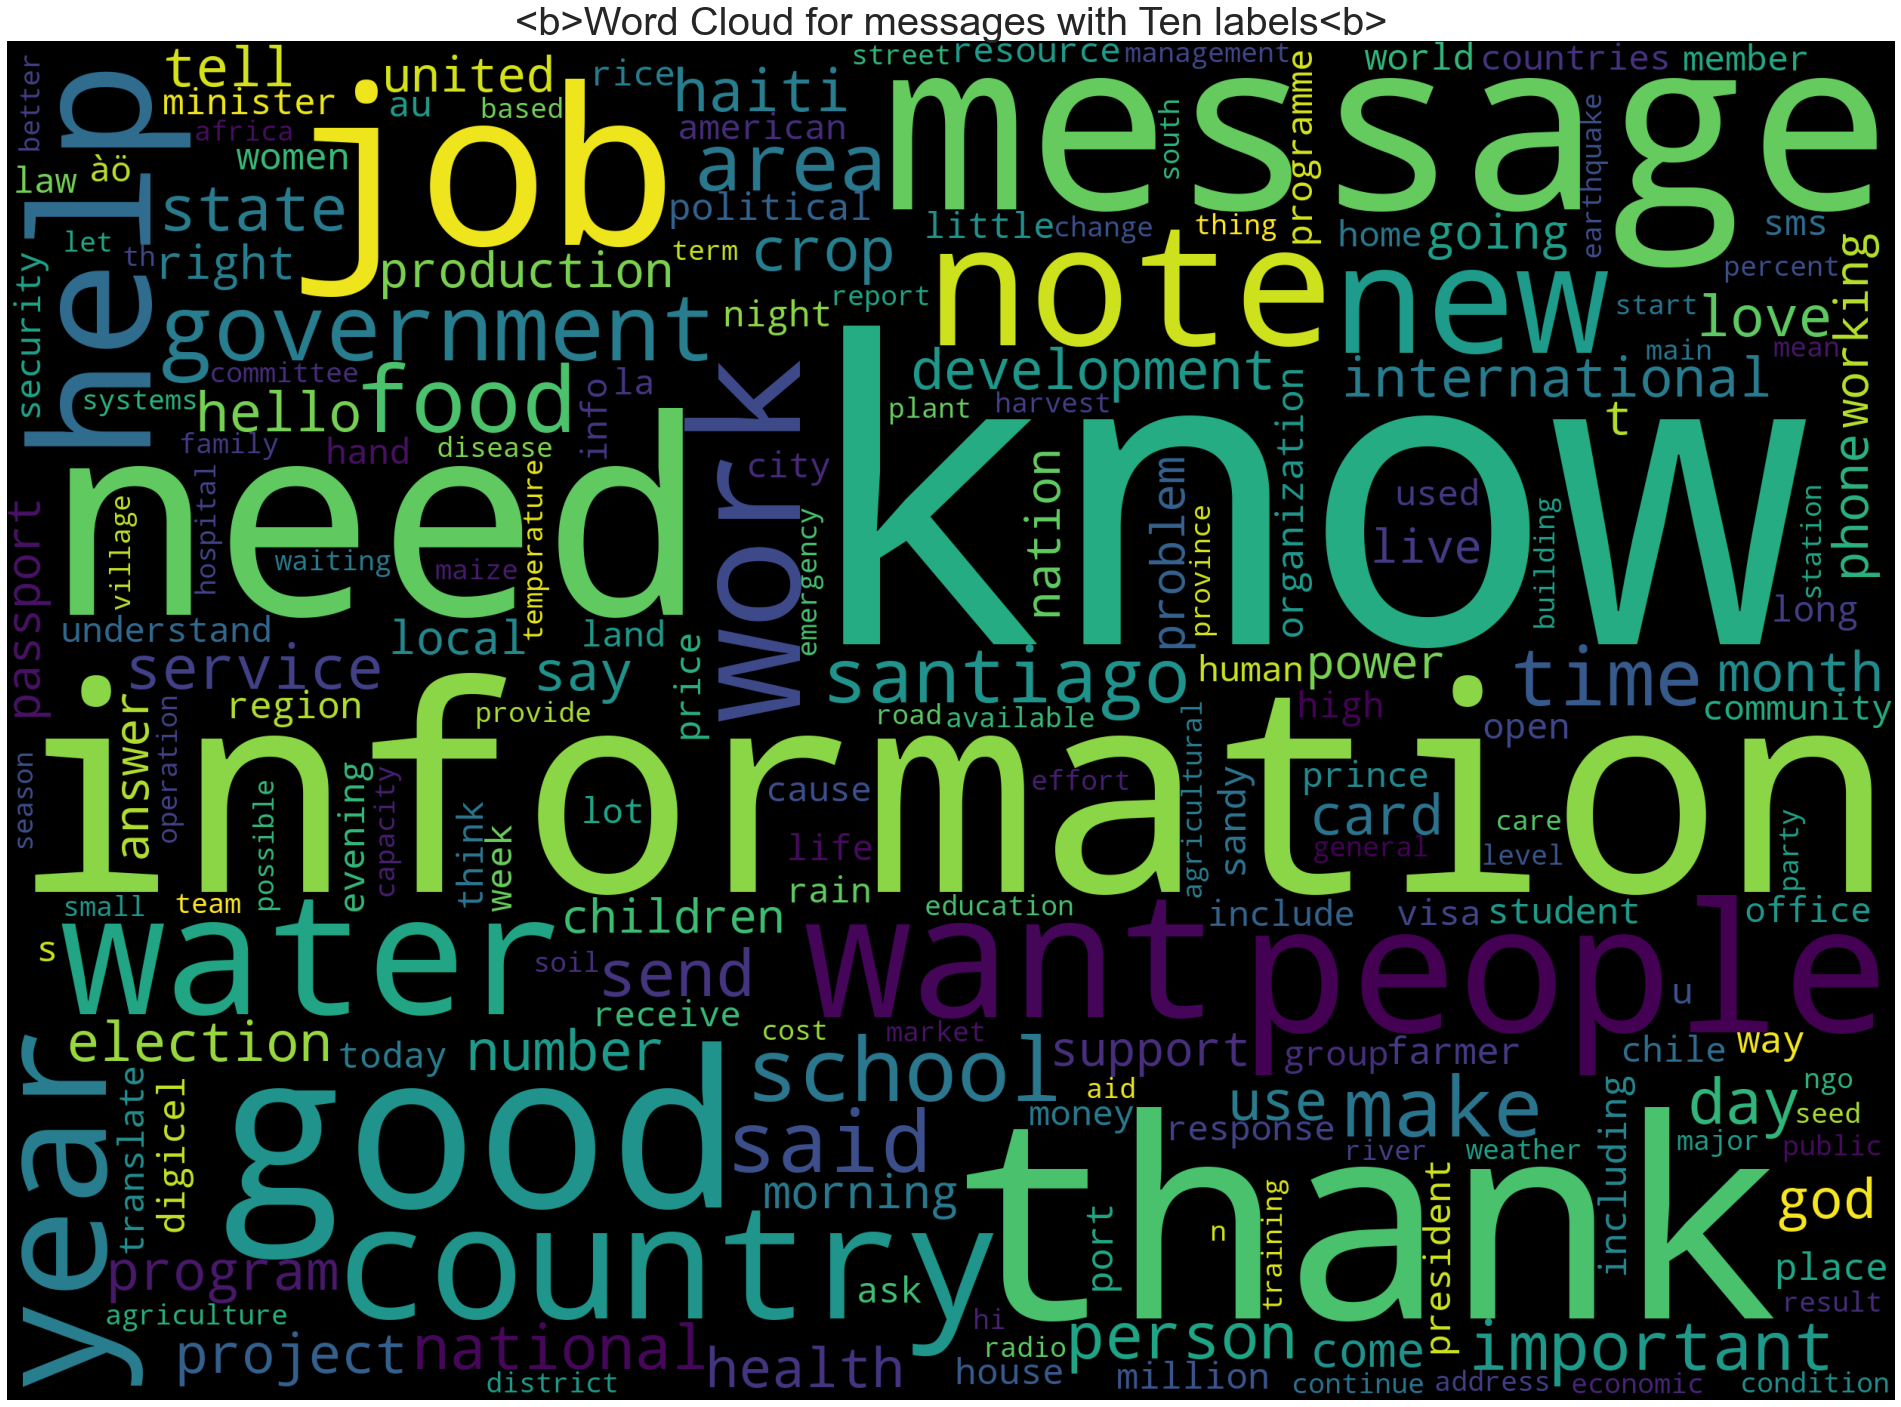

In [78]:
subset = df_new[df_new.LabelSum==10]
plot_title = "<b>Word Cloud for messages with Ten labels<b>"
plot_wordcloud(subset,plot_title)

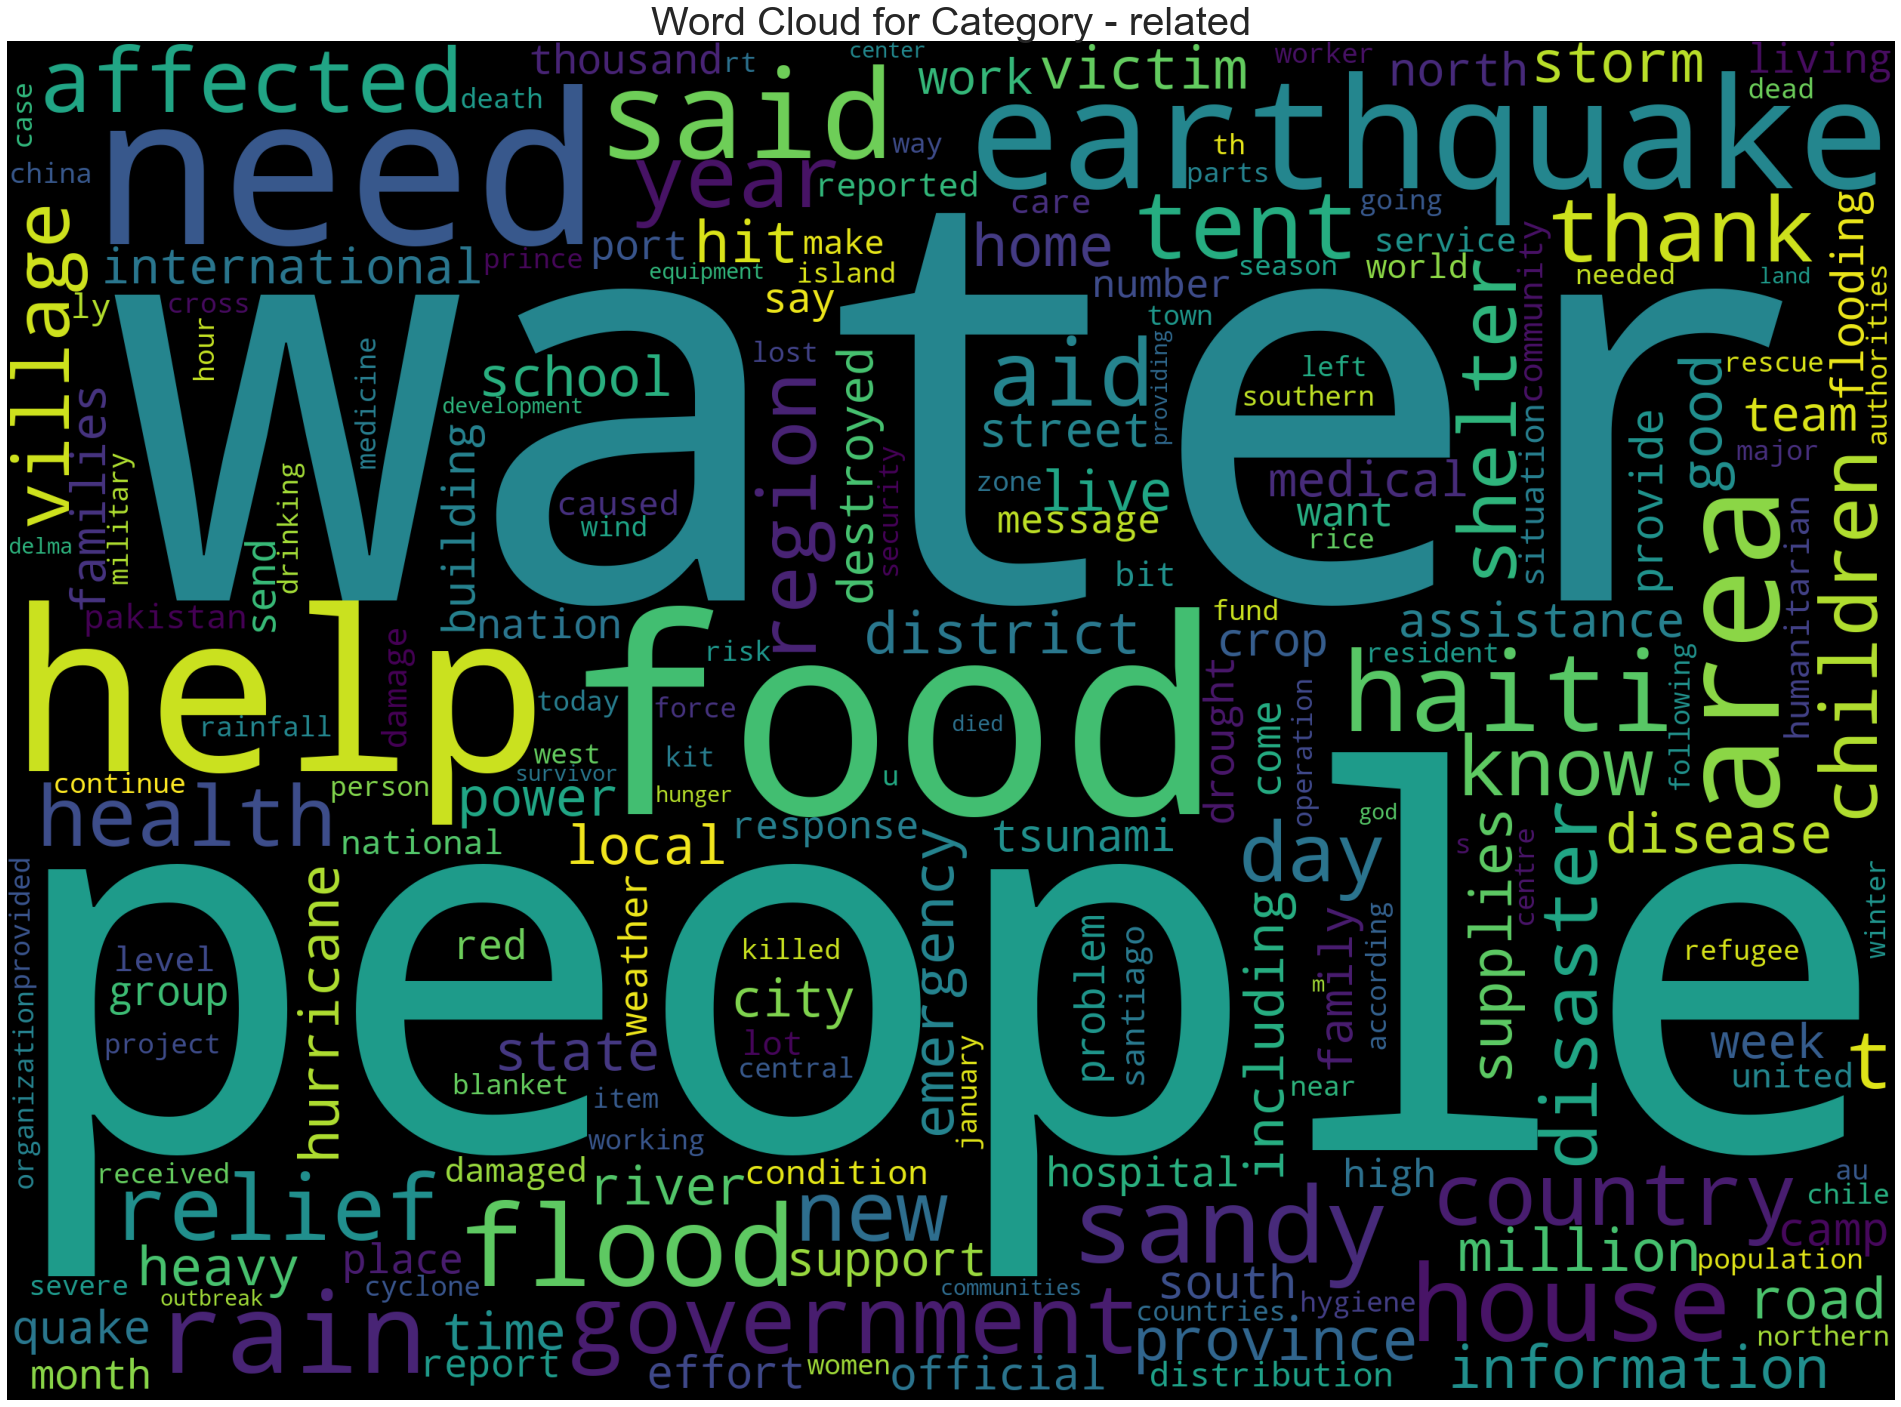

In [12]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# clean
subset = df_new[df_new.Cat_related==1]
text = subset.cleaned_message.values
cloud_related = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Word Cloud for Category - related",fontsize=40)
plt.imshow(cloud_related)# Same code can be used to generate wordclouds of other categories.

### Data Pre-processing

In [80]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

data = df

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

data['cleaned_message'] = data['message'].str.lower()
data['cleaned_message'] = data['cleaned_message'].apply(cleanHtml)
data['cleaned_message'] = data['cleaned_message'].apply(cleanPunc)
data['cleaned_message'] = data['cleaned_message'].apply(keepAlpha)

In [81]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['cleaned_message'] = data['cleaned_message'].apply(removeStopWords)

Next step is Stemming

In [82]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['cleaned_message'] = data['cleaned_message'].apply(stemming)

### Modelling

In [83]:
#Data_new from karktik
data_new = pd.concat([data.cleaned_message,df2_new],axis=1)
data_new.shape

(26248, 37)

In [107]:
print("df new",df_new.shape)
print("data new",data_new.shape)

df new (26248, 38)
data new (26248, 37)


In [122]:
def preprocess_text(text):
    #stopwords = stop_words.ENGLISH_STOP_WORDS
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"there's", "there is ", text)
    text = re.sub(r"let's", "let us ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"wouldn't", "would not ", text)
    text = re.sub(r"couldn't", "could not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    #text = "".join([char for char in text if char not in string.punctuation and not char.isdigit()])
    #text = " ".join([token for token in text.split() if token not in stopwords])
    return text

In [126]:
#Create X,y for NN based models
X = []
sentences = df["message"]
for sen in sentences:
    X.append(preprocess_text(sen))

y = df_new.drop(['cleaned_message','LabelSum'],axis=1)
print ("X, y shapes",len(X),y.shape)

X, y shapes 26248 (26248, 36)


In [166]:
y.columns

Index(['Cat_transport', 'Cat_weather_related', 'Cat_floods', 'Cat_clothing',
       'Cat_death', 'Cat_missing_people', 'Cat_shops', 'Cat_aid_centers',
       'Cat_aid_related', 'Cat_shelter', 'Cat_related', 'Cat_other_aid',
       'Cat_medical_help', 'Cat_tools', 'Cat_direct_report', 'Cat_money',
       'Cat_fire', 'Cat_search_and_rescue', 'Cat_other_infrastructure',
       'Cat_refugees', 'Cat_medical_products', 'Cat_earthquake',
       'Cat_infrastructure_related', 'Cat_offer', 'Cat_hospitals', 'Cat_cold',
       'Cat_water', 'Cat_storm', 'Cat_electricity', 'Cat_request', 'Cat_food',
       'Cat_buildings', 'Cat_security', 'Cat_child_alone', 'Cat_military',
       'Cat_other_weather'],
      dtype='object')

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [129]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

Using TensorFlow backend.


In [130]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('./glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [131]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(36, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [132]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 100)          3108900   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 36)                4644      
Total params: 3,230,792
Trainable params: 121,892
Non-trainable params: 3,108,900
_________________________________________________________________
None


In [133]:
from keras.utils import plot_model
#plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [140]:
history = model.fit(X_train, y_train, batch_size=128, epochs=4, verbose=1, validation_split=0.2)

Train on 16798 samples, validate on 4200 samples
Epoch 1/4
16798/16798 [==============================] - 107s 6ms/step - loss: 0.2192 - acc: 0.9258 - val_loss: 0.2186 - val_acc: 0.9262
Epoch 2/4
16798/16798 [==============================] - 106s 6ms/step - loss: 0.2184 - acc: 0.9266 - val_loss: 0.2188 - val_acc: 0.9262
Epoch 3/4
16798/16798 [==============================] - 106s 6ms/step - loss: 0.2184 - acc: 0.9267 - val_loss: 0.2186 - val_acc: 0.9262
Epoch 4/4
16798/16798 [==============================] - 108s 6ms/step - loss: 0.2184 - acc: 0.9267 - val_loss: 0.2183 - val_acc: 0.9262


In [141]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

5250/5250 [==============================] - 16s 3ms/step
Test Score: 0.2146007044996534
Test Accuracy: 0.9277884364128113


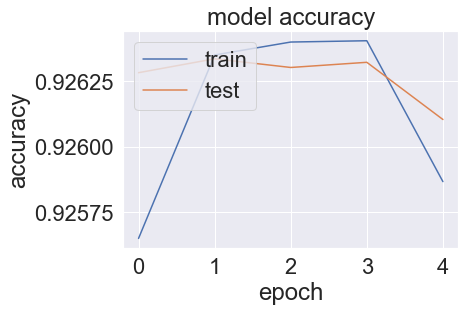

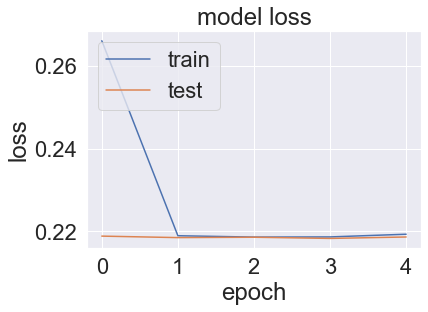

In [137]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [151]:
y_pred

array([[3.9121926e-02, 2.7934462e-01, 8.8584095e-02, ..., 1.2949109e-04,
        4.2560637e-02, 4.9083024e-02],
       [3.9121956e-02, 2.7934465e-01, 8.8584095e-02, ..., 1.2949109e-04,
        4.2560667e-02, 4.9083024e-02],
       [3.9121956e-02, 2.7934465e-01, 8.8584095e-02, ..., 1.2949109e-04,
        4.2560667e-02, 4.9083024e-02],
       ...,
       [3.9121956e-02, 2.7934468e-01, 8.8584095e-02, ..., 1.2940168e-04,
        4.2560667e-02, 4.9083024e-02],
       [3.9121956e-02, 2.7934468e-01, 8.8584155e-02, ..., 1.2940168e-04,
        4.2560667e-02, 4.9083024e-02],
       [3.9121956e-02, 2.7934465e-01, 8.8584095e-02, ..., 1.2940168e-04,
        4.2560667e-02, 4.9083024e-02]], dtype=float32)

In [153]:
y_pred = model.predict(X_test,verbose=1)

In [156]:
y_pred

array([[3.9121926e-02, 2.7934462e-01, 8.8584095e-02, ..., 1.2949109e-04,
        4.2560637e-02, 4.9083024e-02],
       [3.9121956e-02, 2.7934465e-01, 8.8584095e-02, ..., 1.2949109e-04,
        4.2560667e-02, 4.9083024e-02],
       [3.9121956e-02, 2.7934465e-01, 8.8584095e-02, ..., 1.2949109e-04,
        4.2560667e-02, 4.9083024e-02],
       ...,
       [3.9121956e-02, 2.7934468e-01, 8.8584095e-02, ..., 1.2940168e-04,
        4.2560667e-02, 4.9083024e-02],
       [3.9121956e-02, 2.7934468e-01, 8.8584155e-02, ..., 1.2940168e-04,
        4.2560667e-02, 4.9083024e-02],
       [3.9121956e-02, 2.7934465e-01, 8.8584095e-02, ..., 1.2940168e-04,
        4.2560667e-02, 4.9083024e-02]], dtype=float32)

In [161]:
def get_pred(x):
    if x > 0.5:
        return 1
    return 0

y_pred_labels = [[get_pred(pred) for pred in row] for row in y_pred]
y_pred_labels

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [162]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, \
multilabel_confusion_matrix, classification_report

#print('roc_auc: ', roc_auc_score(y_test, y_pred_labels))
    
# Print the confusion matrix
print(metrics.multilabel_confusion_matrix(y_test, y_pred_labels))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred_labels, digits=3))

[[[4998    6]
  [ 240    6]]

 [[3814    1]
  [1420   15]]

 [[4807    2]
  [ 427   14]]

 [[5157    0]
  [  93    0]]

 [[5015   10]
  [ 221    4]]

 [[5193    0]
  [  57    0]]

 [[5229    0]
  [  21    0]]

 [[5200    3]
  [  47    0]]

 [[3106    0]
  [2128   16]]

 [[4795    4]
  [ 440   11]]

 [[   0 1288]
  [   0 3962]]

 [[4555    2]
  [ 691    2]]

 [[4826    6]
  [ 408   10]]

 [[5217    0]
  [  33    0]]

 [[4243    0]
  [1007    0]]

 [[5123    0]
  [ 127    0]]

 [[5200    0]
  [  50    0]]

 [[5102    0]
  [ 148    0]]

 [[5021    1]
  [ 226    2]]

 [[5067    3]
  [ 177    3]]

 [[4991    5]
  [ 244   10]]

 [[4735    3]
  [ 508    4]]

 [[4928    4]
  [ 309    9]]

 [[5222    0]
  [  28    0]]

 [[5206    0]
  [  44    0]]

 [[5155    0]
  [  95    0]]

 [[4928    1]
  [ 312    9]]

 [[4773    3]
  [ 470    4]]

 [[5145    1]
  [ 104    0]]

 [[4355    0]
  [ 895    0]]

 [[4640    7]
  [ 595    8]]

 [[4986    8]
  [ 252    4]]

 [[5155    0]
  [  95    0]]

 [[5250   

In [164]:
from sklearn.metrics import recall_score, precision_score, f1_score

# calculate prediction
precision = precision_score(y_test, y_pred_labels, labels=[0,1], average='micro')
print('Precision: %.3f' % precision)

# calculate recall
recall = recall_score(y_test, y_pred_labels, labels=[0,1], average='micro')
print('Recall: %.3f' % recall)

score = f1_score(y_test, y_pred_labels, average='micro')
print('F-Measure: %.3f' % score)

Precision: 0.750
Recall: 0.012
F-Measure: 0.375


In [163]:
def mapk(acutal, pred, k):

    #creating a list for storing the Average Precision Values
    average_precision = []
    #interating through the whole data and calculating the apk for each 
    for i in range(len(acutal)):
        average_precision.append(apk.apatk(acutal[i], pred[i], k))

    #returning the mean of all the data
    return np.mean(average_precision)


print(mapk(y_test, y_pred,3))

NameError: name 'apk' is not defined

In [142]:
save_model = 1

In [147]:
if save_model:
    #Store the model
    import pickle

    # It is important to use binary access
    with open('LSTM9277.pickle', 'wb') as f:
        pickle.dump(model, f)
    
    save_model = 0

In [98]:
data_new.to_csv("data_new.csv")

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_new, random_state=42, test_size=0.30, shuffle=True)

train_text = train.cleaned_message
test_text = test.cleaned_message

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['cleaned_message'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['cleaned_message'], axis=1)

In [89]:
train, test = train_test_split(df_new, random_state=42, test_size=0.33, shuffle=True)
X_train = train.cleaned_message
X_test = test.cleaned_message
print(X_train.shape)
print(X_test.shape)

(17586,)
(8662,)


In [92]:
labels_data = data_new.drop(['cleaned_message'],axis=1)
labels_corr= labels_data.astype(float).corr()
plot_title = "<b> Correlations across labels"

plot_width, plot_height = 800 , 800

fig = px.imshow(labels_corr,
                    title=plot_title,
                    x=labels_corr.columns,#['Group 0','Group 1','Group 2','Group 3'],
                    y=labels_corr.index,width=plot_width, height=plot_height
                   )
fig.update_xaxes(side="bottom")
fig.update_yaxes(type='category')
fig.show()

#### Key takeaways:
#### i) Some of the labels have high correlations amongst them - e.g. 0.64 between Cat_request & Cat_direct_report . 
#### ii) The label Cat_child_alone is not related to any message 
#### iii) Predicting labels individually using OnevsRest would be a good strategy for labels with low correlations (say +/- 0.15) amongst them, but not a good strategy for labels with high correlations amongst them

In [104]:
unique_word_list = data_new['cleaned_message'].apply(lambda x: x.split(' ')).apply(lambda y: len(set(y))).sum()
print('Total number of words in the dataset' , data_new['cleaned_message'].apply(lambda x: len(x.split(' '))).sum())
print('Numer of unique words in the dataset ',unique_word_list)

Total number of words in the dataset 367599
Numer of unique words in the dataset  348436


In [106]:
data_new.head(10)

cleaned_message  Cat_transport  \
0     weather updat cold front cuba could pass haiti              0   
1                                      hurrican over              0   
2                                   look someon name              0   
3  un report leogan destroy hospit st croix funct...              0   
4     say west side haiti rest countri today tonight              0   
5                                inform nation palac              0   
6                             storm sacr heart jesus              0   
7               pleas need tent water silo thank you              0   
8                 would like receiv messag thank you              0   
9  croix des bouquet health issu worker santo are...              0   

   Cat_weather_related  Cat_floods  Cat_clothing  Cat_death  \
0                    0           0             0          0   
1                    1           0             0          0   
2                    0           0             0          0   
3                    0           0             0          0   
4                    0           0             0          0   
5                    0           0             0          0   
6                    1           0             0          0   
7                    0           0             0          0   
8                    0           0             0          0   
9                    0           0             0          0   

   Cat_missing_people  Cat_shops  Cat_aid_centers  Cat_aid_related  ...  \
0                   0          0                0                0  ...   
1                   0          0                0                1  ...   
2                   0          0                0                0  ...   
3                   0          0                0                1  ...   
4                   0          0                0                0  ...   
5                   0          0                0                0  ...   
6                   0          0                0                0  ...   
7                   0          0                0                1  ...   
8                   0          0                0                0  ...   
9                   0          0                0                1  ...   

   Cat_water  Cat_storm  Cat_electricity  Cat_request  Cat_food  \
0          0          0                0            0         0   
1          0          1                0            0         0   
2          0          0                0            0         0   
3          0          0                0            1         0   
4          0          0                0            0         0   
5          0          0                0            0         0   
6          0          1                0            0         0   
7          1          0                0            1         0   
8          0          0                0            0         0   
9          0          0                0            1         0   

   Cat_buildings  Cat_security  Cat_child_alone  Cat_military  \
0              0             0                0             0   
1              0             0                0             0   
2              0             0                0             0   
3              1             0                0             0   
4              0             0                0             0   
5              0             0                0             0   
6              0             0                0             0   
7              0             0                0             0   
8              0             0                0             0   
9              0             0                0             0   

   Cat_other_weather  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
5                  0  
6                  0  
7                  0  
8                  0  
9                  0  

[10 rows x 37 columns]

#### OneVsRest Strategy

#### Naive Bayes

In [96]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

for category in cat_labels:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Cat_other_aid
Test accuracy is 0.871738628492265
... Processing Cat_clothing
Test accuracy is 0.9841837912722236
... Processing Cat_other_infrastructure
Test accuracy is 0.9571692449780651
... Processing Cat_aid_related
Test accuracy is 0.7562918494574001
... Processing Cat_cold
Test accuracy is 0.9806049411221427
... Processing Cat_direct_report
Test accuracy is 0.830755021934888
... Processing Cat_storm
Test accuracy is 0.9079889171092127
... Processing Cat_tools
Test accuracy is 0.9937658739321172
... Processing Cat_refugees
Test accuracy is 0.9664049873008543
... Processing Cat_request
Test accuracy is 0.859847610251674
... Processing Cat_related
Test accuracy is 0.7841145232048026
... Processing Cat_weather_related
Test accuracy is 0.821403832833064
... Processing Cat_other_weather
Test accuracy is 0.9538212883860541
... Processing Cat_military
Test accuracy is 0.9665204340798892
... Processing Cat_food
Test accuracy is 0.8888247517894251
... Processing Cat_search_a

/Applications/anaconda/lib/python3.6/site-packages/sklearn/multiclass.py:77: UserWarning:

Label not 0 is present in all training examples.



Test accuracy is 1.0
... Processing Cat_transport
Test accuracy is 0.9533595012699145
... Processing Cat_medical_help
Test accuracy is 0.9202262756869083
... Processing Cat_floods
Test accuracy is 0.916301085199723
... Processing Cat_medical_products
Test accuracy is 0.9535903948279842
... Processing Cat_shelter
Test accuracy is 0.9144539367351651
... Processing Cat_infrastructure_related
Test accuracy is 0.9363888247517894
... Processing Cat_buildings
Test accuracy is 0.9504733317940429
... Processing Cat_shops
Test accuracy is 0.994804894943431
... Processing Cat_money
Test accuracy is 0.9762179635188178
... Processing Cat_hospitals
Test accuracy is 0.9906488108981759


#### Linear SVC

In [98]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

for category in cat_labels:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Cat_other_aid
Test accuracy is 0.8635419071807896
... Processing Cat_clothing
Test accuracy is 0.9884553220965135
... Processing Cat_other_infrastructure
Test accuracy is 0.9540521819441238
... Processing Cat_aid_related
Test accuracy is 0.7477487878088201
... Processing Cat_cold
Test accuracy is 0.9834911105980143
... Processing Cat_direct_report
Test accuracy is 0.849572846917571
... Processing Cat_storm
Test accuracy is 0.9441237589471254
... Processing Cat_tools
Test accuracy is 0.9937658739321172
... Processing Cat_refugees
Test accuracy is 0.9699838374509351
... Processing Cat_request
Test accuracy is 0.8935580697298545
... Processing Cat_related
Test accuracy is 0.8205957053798199
... Processing Cat_weather_related
Test accuracy is 0.876933733548834
... Processing Cat_other_weather
Test accuracy is 0.9528977141537751
... Processing Cat_military
Test accuracy is 0.9688293696605864
... Processing Cat_food
Test accuracy is 0.9422766104825675
... Processing Cat_search

/Applications/anaconda/lib/python3.6/site-packages/sklearn/multiclass.py:77: UserWarning:

Label not 0 is present in all training examples.



Test accuracy is 1.0
... Processing Cat_transport
Test accuracy is 0.9600554144539367
... Processing Cat_medical_help
Test accuracy is 0.924844146848303
... Processing Cat_floods
Test accuracy is 0.955552990071577
... Processing Cat_medical_products
Test accuracy is 0.9595936273377973
... Processing Cat_shelter
Test accuracy is 0.943546525051951
... Processing Cat_infrastructure_related
Test accuracy is 0.9321172939274994
... Processing Cat_buildings
Test accuracy is 0.9599399676749019
... Processing Cat_shops
Test accuracy is 0.994804894943431
... Processing Cat_money
Test accuracy is 0.9774878780882014
... Processing Cat_hospitals
Test accuracy is 0.9903024705610713


### Logistic Regression

In [111]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

for category in cat_labels:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Cat_other_aid
Test accuracy is 0.8750865850842762
... Processing Cat_clothing
Test accuracy is 0.9859154929577465
... Processing Cat_other_infrastructure
Test accuracy is 0.9576310320942045
... Processing Cat_aid_related
Test accuracy is 0.7739552066497345
... Processing Cat_cold
Test accuracy is 0.9819903024705611
... Processing Cat_direct_report
Test accuracy is 0.8576541214500115
... Processing Cat_storm
Test accuracy is 0.9369660586469637
... Processing Cat_tools
Test accuracy is 0.9937658739321172
... Processing Cat_refugees
Test accuracy is 0.9680212422073424
... Processing Cat_request
Test accuracy is 0.8973678134380051
... Processing Cat_related
Test accuracy is 0.8284460863541907
... Processing Cat_weather_related
Test accuracy is 0.8720849688293697
... Processing Cat_other_weather
Test accuracy is 0.9546294158392981
... Processing Cat_military
Test accuracy is 0.9673285615331332
... Processing Cat_food
Test accuracy is 0.9377741861002078
... Processing Cat_sear

/Applications/anaconda/lib/python3.6/site-packages/sklearn/multiclass.py:77: UserWarning:

Label not 0 is present in all training examples.



Test accuracy is 1.0
... Processing Cat_transport
Test accuracy is 0.9568229046409605
... Processing Cat_medical_help
Test accuracy is 0.9247287000692681
... Processing Cat_floods
Test accuracy is 0.9459709074116832
... Processing Cat_medical_products
Test accuracy is 0.9587854998845532
... Processing Cat_shelter
Test accuracy is 0.9383514199953821
... Processing Cat_infrastructure_related
Test accuracy is 0.9369660586469637
... Processing Cat_buildings
Test accuracy is 0.9583237127684138
... Processing Cat_shops
Test accuracy is 0.994804894943431
... Processing Cat_money
Test accuracy is 0.9766797506349573
... Processing Cat_hospitals
Test accuracy is 0.9905333641191411


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in cat_labels:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

**Processing Cat_medical_help comments...**
Test accuracy is 0.9201269841269841


**Processing Cat_floods comments...**
Test accuracy is 0.92


**Processing Cat_tools comments...**
Test accuracy is 0.9935238095238095


**Processing Cat_storm comments...**
Test accuracy is 0.9107301587301587


**Processing Cat_infrastructure_related comments...**
Test accuracy is 0.9367619047619048


**Processing Cat_security comments...**
Test accuracy is 0.9823492063492063


**Processing Cat_direct_report comments...**
Test accuracy is 0.8321269841269842


**Processing Cat_search_and_rescue comments...**
Test accuracy is 0.9728253968253968


**Processing Cat_child_alone comments...**
Test accuracy is 1.0


**Processing Cat_other_aid comments...**
Test accuracy is 0.8708571428571429


**Processing Cat_transport comments...**
Test accuracy is 0.9528888888888889


**Processing Cat_aid_centers comments...**
Test accuracy is 0.9894603174603175


**Processing Cat_hospitals comments...**
Test accuracy is 0.9

#### Binary Relevance

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())# train
classifier.fit(x_train, y_train)# predict
predictions = classifier.predict(x_test)# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

#### Classifier Chain

In [ ]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())# Training logistic regression model on train data
classifier.fit(x_train, y_train)# predict
predictions = classifier.predict(x_test)# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

### BERT 

In [25]:
!pip install -q git+https://github.com/huggingface/transformers.git

In [19]:
# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast# Then what you need from tensorflow.keras
#from transformers.modeling_bert import BertModel, BertForMaskedLM, BertConfig, BertTokenizerFast
import tensorflow as tensorflow
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [26]:
#!pip install bert-for-tf2

     |████████████████████████████████| 41 kB 152 kB/s eta 0:00:01
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.9-py3-none-any.whl size=30536 sha256=318c4558885c4c02380ddbe1392f42acd9f593002efa97c47a4b74f6b9282a29
  Stored in directory: /Users/pravinbhat/Library/Caches/pip/wheels/19/18/97/0d58cab1b354f98e6b1b3791e9b2dc14ce537d63daec0d4924
  Created wheel for params-flow: filename=params_flow-0.8.2-py3-none-any.whl size=19471 sha256=ec52e53d210342c8eebd8e2051cfd8f257b9c8325b355d344c1f2838ec19ac68
  Stored in directory: /Users/pravinbhat/Library/Caches/pip/wheels/9d/c6/c5/a3f4a618640f461130f47e76703156c13a39cc3b96b5f4f439
  Created wheel for py-params: filename=py_params-0.10.2-py3-none-any.whl size=7910 sha256=2dc85686b4b6e3a74a8ea49bf78d56329bb708694b6f8cf7a500116bbd75c031
  Stored in directory: /Users/pravinbhat/Library/Caches/pip/wheels/48/77/b1/d0b01d524d972512852e1fc23b197ad9d3d1685e349b8cabb6
Successfully built bert-for-tf2 params-flow py-params


In [27]:
import bert


In [28]:
# Name of the BERT model to use
model_name = 'bert-base-uncased'# Max length of tokens
max_length = 100# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
config.output_hidden_states = False# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)# Load the Transformers BERT model
transformer_model = TFBertModel.from_pretrained(model_name, config = config)

ImportError: 
TFBertModel requires the TensorFlow library but it was not found in your environment. Checkout the instructions on the
installation page: https://www.tensorflow.org/install and follow the ones that match your environment.


In [29]:
from transformers import pipeline

In [32]:
classifier = pipeline("zero-shot-classification",device=-1)

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartModel: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [64]:
all_labels = [val [4:] for val in cat_labels]

In [67]:
df_message_with_tags

cleaned_message  \
0         weather updat cold front cuba could pass haiti   
1                                          hurrican over   
2                                       look someon name   
3      un report leogan destroy hospit st croix funct...   
4         say west side haiti rest countri today tonight   
...                                                  ...   
26243  train demonstr enhanc micronutri protein energ...   
26244  suitabl candid select ocha jakarta current wor...   
26245  proshika oper cox bazar municip union ramu cho...   
26246  women protest conduct elect teargass tri conve...   
26247  radic shift think came result meet recogn hiv ...   

                                                    tags  
0                                              [related]  
1      [related, aid_related, other_aid, weather_rela...  
2                                              [related]  
3      [related, request, aid_related, medical_produc...  
4                                              [related]  
...                                                  ...  
26243                                                NaN  
26244                                                NaN  
26245                                                NaN  
26246                                                NaN  
26247                                                NaN  

[26248 rows x 2 columns]

In [75]:
from tqdm import tqdm

max_iter = 30
y_pred = []
y = []
for i in tqdm(range(max_iter)):
    messages = df_message_with_tags.iloc[i,]['cleaned_message']
    tags = df_message_with_tags.iloc[i,]['tags']
    op = classifier(messages, all_labels, multi_class=True)
    labels = op['labels'] 
    scores = op['scores']
    res_dict = {label : score for label,score in zip(labels, scores)}
    sorted_dict = dict(sorted(res_dict.items(), key=lambda x:x[1],reverse = True)) #sorting the dictionary of labels in descending order based on their score
    categories = []
    for i, (k,v) in enumerate(sorted_dict.items()):
        if(i > 3): #storing only the best 4 predictions
            break
        else:
            categories.append(k)
    y.append(tags)
    y_pred.append(categories)


  0%|          | 0/30 [00:00<?, ?it/s]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.

  3%|▎         | 1/30 [00:10<05:15, 10.87s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.

  7%|▋         | 2/30 [00:18<04:06,  8.80s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.

 10%|█         | 3/30 [00:25<03:38,  8.09s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.

 13%|█▎        | 4/30 [00:37<04:06,  9.46s/it]The `multi_class` argument has been deprecated and renamed to `multi_label`. `multi_class` will be removed in a future version of Transformers.

 17%|█▋        | 5/30 [00:46<03:56,  9.48s/it]The `m

In [76]:
zero_shot_class_out = pd.DataFrame(list(zip(y, y_pred)), columns =['Labels', 'Predicted_Labels']) 
#zero_shot_class_out.to_csv('output.csv')
zero_shot_class_out.head(10)


Labels  \
0                                          [related]   
1  [related, aid_related, other_aid, weather_rela...   
2                                          [related]   
3  [related, request, aid_related, medical_produc...   
4                                          [related]   
5                                                 []   
6                  [related, weather_related, storm]   
7  [related, request, aid_related, water, shelter...   
8                                                 []   
9  [related, request, aid_related, medical_help, ...   

                                    Predicted_Labels  
0            [related, weather_related, cold, offer]  
1     [weather_related, related, storm, aid_related]  
2  [related, other_infrastructure, infrastructure...  
3  [related, hospitals, infrastructure_related, s...  
4         [related, offer, weather_related, shelter]  
5           [related, offer, direct_report, request]  
6           [related, weather_related, storm, offer]  
7  [related, request, infrastructure_related, aid...  
8             [related, request, offer, aid_related]  
9        [related, aid_related, offer, medical_help]

In [83]:


cat_idx = {cat : i for i,cat in enumerate(all_labels)}  # Map of category and it's index to encode the o/p for evaluation



In [84]:
cat_idx

{'request': 0,
 'money': 1,
 'shelter': 2,
 'infrastructure_related': 3,
 'child_alone': 4,
 'weather_related': 5,
 'cold': 6,
 'death': 7,
 'water': 8,
 'military': 9,
 'security': 10,
 'earthquake': 11,
 'other_weather': 12,
 'food': 13,
 'other_infrastructure': 14,
 'transport': 15,
 'offer': 16,
 'other_aid': 17,
 'search_and_rescue': 18,
 'buildings': 19,
 'tools': 20,
 'clothing': 21,
 'medical_help': 22,
 'hospitals': 23,
 'aid_centers': 24,
 'direct_report': 25,
 'electricity': 26,
 'aid_related': 27,
 'refugees': 28,
 'shops': 29,
 'related': 30,
 'storm': 31,
 'medical_products': 32,
 'floods': 33,
 'fire': 34,
 'missing_people': 35}

In [92]:
zero_shot_class_out.shape

(30, 2)

In [87]:
y_pred = zero_shot_class_out.Predicted_Labels
y_pred

0               [related, weather_related, cold, offer]
1        [weather_related, related, storm, aid_related]
2     [related, other_infrastructure, infrastructure...
3     [related, hospitals, infrastructure_related, s...
4            [related, offer, weather_related, shelter]
5              [related, offer, direct_report, request]
6              [related, weather_related, storm, offer]
7     [related, request, infrastructure_related, aid...
8                [related, request, offer, aid_related]
9           [related, aid_related, offer, medical_help]
10            [related, cold, missing_people, refugees]
11         [related, offer, electricity, direct_report]
12               [related, water, request, aid_related]
13                  [related, food, offer, aid_related]
14      [related, offer, request, other_infrastructure]
15             [related, shelter, request, aid_related]
16                [related, aid_related, request, food]
17             [related, request, offer, direct_

In [91]:
len(y)

30

In [88]:
y_trueEncoded = []
y_predEncoded = []
for y_true, y_pred in zip(y, y_pred):
    encTrue = [0] * len(all_labels)
    for cat in y_true:
        idx = cat_idx[cat]
        encTrue[idx] = 1
    y_trueEncoded.append(encTrue)
    encPred = [0] * len(all_labels)
    for cat in y_pred:
        print('Cat = ',cat)
        idx = cat_idx[cat]
        encPred[idx] = 1
    y_predEncoded.append(encPred)

Cat =  related
Cat =  weather_related
Cat =  cold
Cat =  offer
Cat =  weather_related
Cat =  related
Cat =  storm
Cat =  aid_related
Cat =  related
Cat =  other_infrastructure
Cat =  infrastructure_related
Cat =  offer
Cat =  related
Cat =  hospitals
Cat =  infrastructure_related
Cat =  shelter
Cat =  related
Cat =  offer
Cat =  weather_related
Cat =  shelter
Cat =  related
Cat =  offer
Cat =  direct_report
Cat =  request
Cat =  related
Cat =  weather_related
Cat =  storm
Cat =  offer
Cat =  related
Cat =  request
Cat =  infrastructure_related
Cat =  aid_related
Cat =  related
Cat =  request
Cat =  offer
Cat =  aid_related
Cat =  related
Cat =  aid_related
Cat =  offer
Cat =  medical_help


TypeError: 'float' object is not iterable

In [74]:
from sklearn.metrics import hamming_loss
print('Hamming Loss =', hamming_loss(y_trueEncoded,y_predEncoded))

Hamming Loss = 0.09166666666666666


In [ ]:
#Hemming loss by iterations
#10 - iter -> 9.166%
#30 - > - 


In [32]:
# Load the MainLayer
bert = transformer_model.layers[0]# Build your model input
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
inputs = {'input_ids': input_ids}# Load the Transformers BERT model as a layer in a Keras model
bert_model = bert(inputs)[1]
dropout = Dropout(config.hidden_dropout_prob, name='pooled_output')
pooled_output = dropout(bert_model, training=False)# Then build your model output
issue = Dense(units=len(data.Issue_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='issue')(pooled_output)
product = Dense(units=len(data.Product_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='product')(pooled_output)
outputs = {'issue': issue, 'product': product}# And combine it all in a model object
model = Model(inputs=inputs, outputs=outputs, name='BERT_MultiLabel_MultiClass')# Take a look at the model
model.summary()

In [28]:
transformer_model = TFBertModel.from_pretrained(model_name, config = config)
#def clean(doc): #doc is a string of text
#    #doc = doc.replace("</br>", " ") #This text contains a lot of <br/> tags.
#    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
#    doc = " ".join([token for token in doc.split() if token not in stopwords])
#    #remove punctuation and numbers
#    return doc

ImportError: 
TFBertModel requires the TensorFlow library but it was not found in your environment. Checkout the instructions on the
installation page: https://www.tensorflow.org/install and follow the ones that match your environment.


### Modelling

In [35]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#Step 1: train-test split
#X = our_data.text #the column text contains textual data to extract features from
y = df2_new.values #these are the columns we are learning to predict. 
print(X.shape, y.shape)
# split X and y into training and testing sets. By default, it splits 75% training and 25% test
#random_state=1 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(26248,) (26248, 36)
(19686,) (19686, 36)
(6562,) (6562, 36)


In [36]:
#Step 2-3: Preprocess and Vectorize train and test data
vect = CountVectorizer(preprocessor=clean) #instantiate a vectoriezer
X_train_dtm = vect.fit_transform(X_train)#use it to extract features from training data
#transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)

(19686, 37474) (6562, 37474)


In [37]:
X_train_dtm[:5]

<5x37474 sparse matrix of type '<class 'numpy.int64'>'
	with 48 stored elements in Compressed Sparse Row format>

In [39]:
#Step 3: Train the classifier and predict for test data
nb = MultinomialNB() #instantiate a Multinomial Naive Bayes model
%time nb.fit(X_train_dtm, y_train)#train the model(timing it with an IPython "magic command")
y_pred_class = nb.predict(X_test_dtm)#make class predictions for X_test_dtm

ValueError: y should be a 1d array, got an array of shape (19686, 36) instead.

#### Normalization

In [39]:
text

0        Weather update - a cold front from Cuba that c...
1                  Is the Hurricane over or is it not over
2                          Looking for someone but no name
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        says: west side of Haiti, rest of the country ...
                               ...                        
26243    The training demonstrated how to enhance micro...
26244    A suitable candidate has been selected and OCH...
26245    Proshika, operating in Cox's Bazar municipalit...
26246    Some 2,000 women protesting against the conduc...
26247    A radical shift in thinking came about as a re...
Name: message, Length: 26248, dtype: object

In [37]:
# Convert to lowercase
for t in text:
    print(t)
    text = t.lower() 
    #print(text)

0        Weather update - a cold front from Cuba that c...
1                  Is the Hurricane over or is it not over
2                          Looking for someone but no name
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        says: west side of Haiti, rest of the country ...
                               ...                        
26243    The training demonstrated how to enhance micro...
26244    A suitable candidate has been selected and OCH...
26245    Proshika, operating in Cox's Bazar municipalit...
26246    Some 2,000 women protesting against the conduc...
26247    A radical shift in thinking came about as a re...
Name: message, Length: 26248, dtype: object


AttributeError: 'Series' object has no attribute 'lower'

In [15]:
X[:5]

array(['Weather update - a cold front from Cuba that could pass over Haiti',
       'Is the Hurricane over or is it not over',
       'Looking for someone but no name',
       'UN reports Leogane 80-90 destroyed. Only Hospital St. Croix functioning. Needs supplies desperately.',
       'says: west side of Haiti, rest of the country today and tonight'],
      dtype=object)

In [16]:
import re

for t in X[:,5]:
    t = re.sub(r"[^a-zA-Z0-9]", " ",t)
    print(t)

IndexError: too many indices for array

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pravinbhat/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
from nltk.tokenize import sent_tokenize

#Split text into sentences
for t in text:
    sentences = sent_tokenize(t)
    #print(sentences)

In [29]:
#Split text into words
for t in text:
    words = word_tokenize(t)
    #print(words)

In [23]:
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
from nltk.stem.porter import PorterStemmer

for t in text:
    words = word_tokenize(t)
    words_wo_sw = [w for w in words if w not in stopwords.words("english")]
    #print(words_wo_sw)

# Reduce words to their stems
#stemmed = [PorterStemmer().stem(w) for w in words_wo_sw]
#print("Stemming ...")
#print(stemmed)

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]

# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)